## Import required Packages

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor
import matplotlib.pyplot as plt
from sklearn import preprocessing
import matplotlib.ticker as ticker
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
import sklearn.metrics as metrics
%matplotlib inline

## Importing Data

In [2]:
data = pd.read_csv('churn.csv')

In [3]:
pd.set_option('display.max_columns', None)

In [4]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
data.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

Looking at the datatypes we find that the **Total Charges** if of **Object Data** type.
We need to convert it into **Float Data Type**

In [6]:
try:
    data.TotalCharges = pd.to_numeric(data.TotalCharges)
except Exception as e:
    print(e)

Unable to parse string " " at position 488


In [7]:
data.iloc[488,-2]

' '

We can see that we are unable to change the data type from object to float 
because **' '** cannot be converted into float value so, we'll replace them with **NaN** value

In [8]:
for i,d in enumerate(data['TotalCharges']):
    if d == ' ':
        data.iloc[i,-2]=np.nan

In [9]:
data["TotalCharges"] = [float(i) for i in data["TotalCharges"]]

By this point we see that all the data types of attributes are appropriate

In [10]:
data.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [11]:
categorical_cols = ['gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'Churn']

## Let's Check for missing value

In [12]:
data.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

We found that there are 11 missing values in **Total Charges** and looking at the size of missing values I prefer removing them from my data set 

In [13]:
data.dropna(axis=0,inplace=True)

In [14]:
data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


In [16]:
data.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


<AxesSubplot:ylabel='MonthlyCharges'>

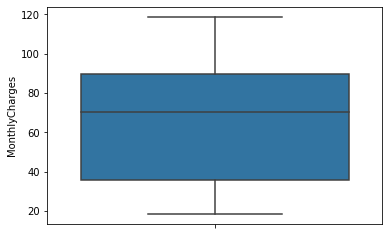

In [17]:
sns.boxplot(y='MonthlyCharges',data=data)

<AxesSubplot:ylabel='TotalCharges'>

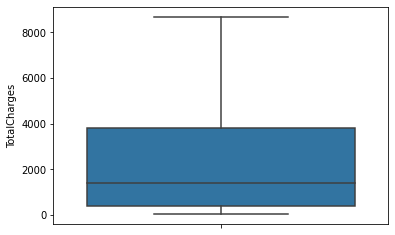

In [18]:
sns.boxplot(y='TotalCharges',data=data)

### We see no **Outliers** in the above obtained boxplots
- From the description and boxplot for the column TotalCharges we see that Standard Deviation is Very High and 75% of the data lies in the range between [0 - 4000]

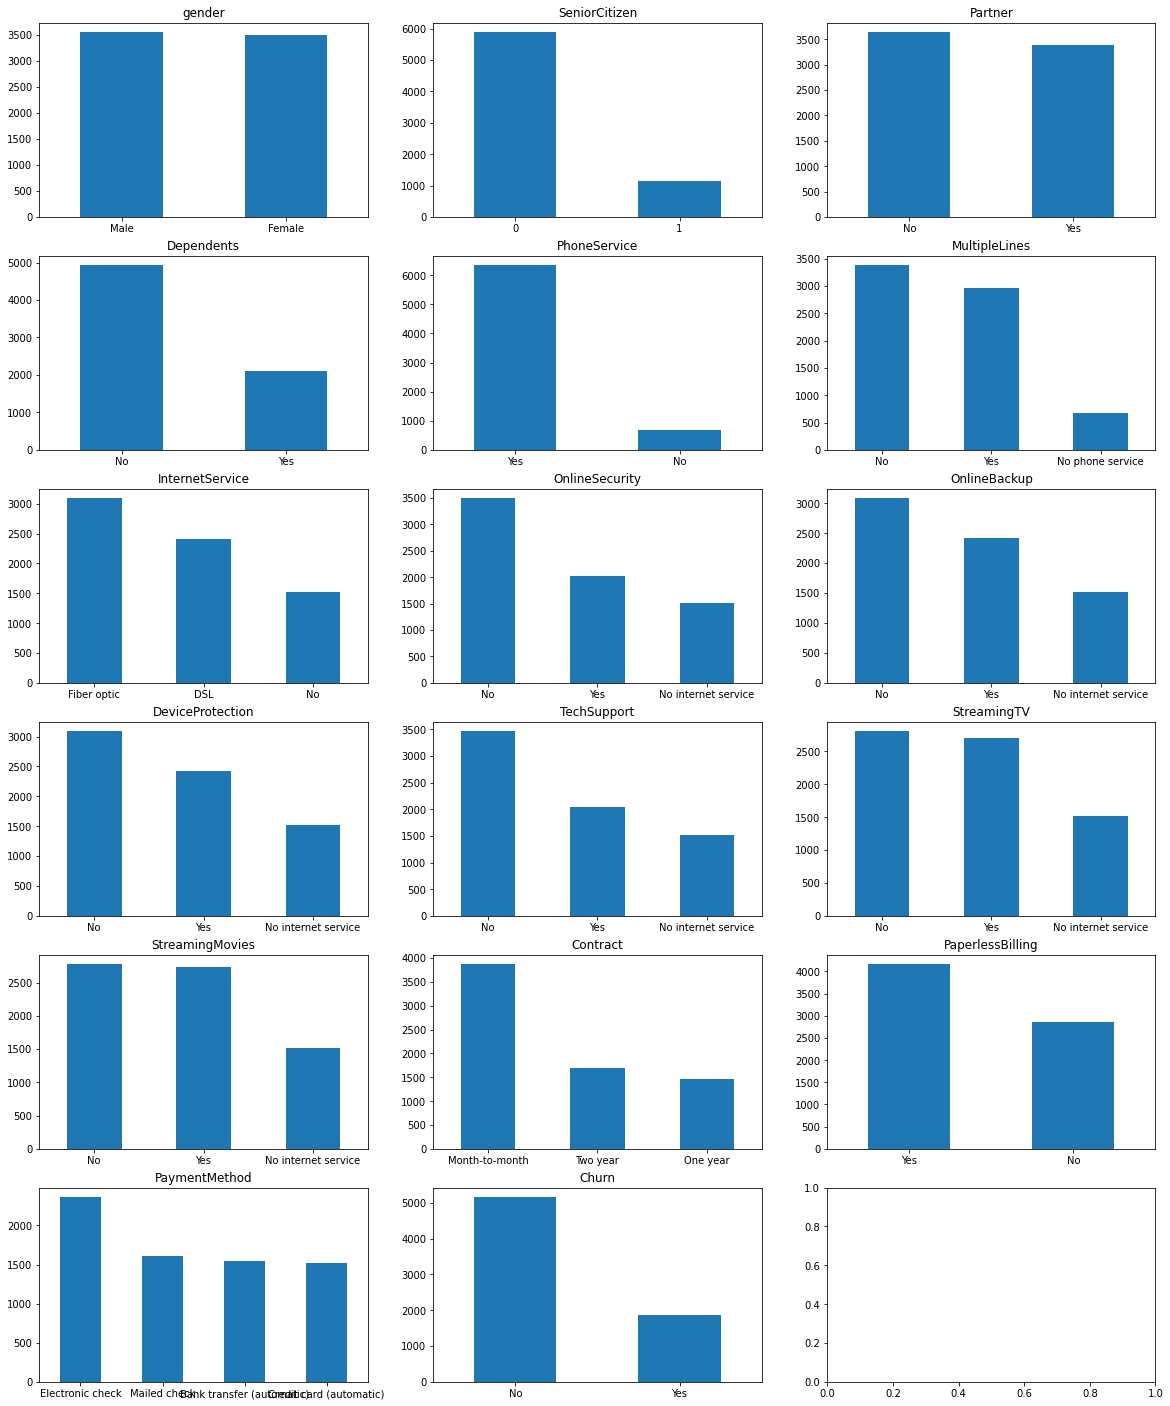

In [19]:
fig, axes = plt.subplots(nrows = 6,ncols = 3,
figsize = (20,25))
for i, item in enumerate(categorical_cols):
    if i < 3:
        ax = data[item].value_counts().plot(kind = 'bar',ax=axes[0,i],rot = 0)
        
    elif i >=3 and i < 6:
        ax = data[item].value_counts().plot(kind = 'bar',ax=axes[1,i-3],rot = 0)
    
    elif i >=6 and i < 9:
        ax = data[item].value_counts().plot(kind = 'bar',ax=axes[2,i-6],rot = 0)
    
    elif i >=9 and i < 12:
        ax = data[item].value_counts().plot(kind = 'bar',ax=axes[3,i-9],rot = 0)
    
    elif i >=12 and i < 15:
        ax = data[item].value_counts().plot(kind = 'bar',ax=axes[4,i-12],rot = 0)
        
    elif i < 18:
        ax = data[item].value_counts().plot(kind = 'bar',ax=axes[5,i-15],rot = 0)
    ax.set_title(item)

## Insights gained from above plots
- There is no Gender Bias
- Most of the people are **Young**
- Half of the people have no **Partner**
- Most of them have no **dependents**
- Most of them use **Phone Services**
- People prefer **Electronic Check**

Text(0.5, 0, 'Contract Type')

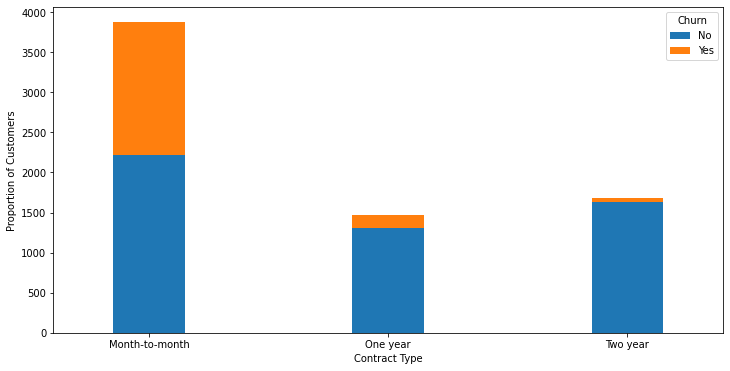

In [20]:
import matplotlib.ticker as mtick
contract_churn = data.groupby(['Contract','Churn']).size().unstack()
contract_churn.rename(columns={0:'No', 1:'Yes'}, inplace=True)
ax = contract_churn.plot(kind='bar',width = 0.3,stacked = True,rot = 0,figsize = (12,6))
plt.ylabel('Proportion of Customers')
plt.xlabel('Contract Type')

Text(0.5, 0, 'Payment Method ')

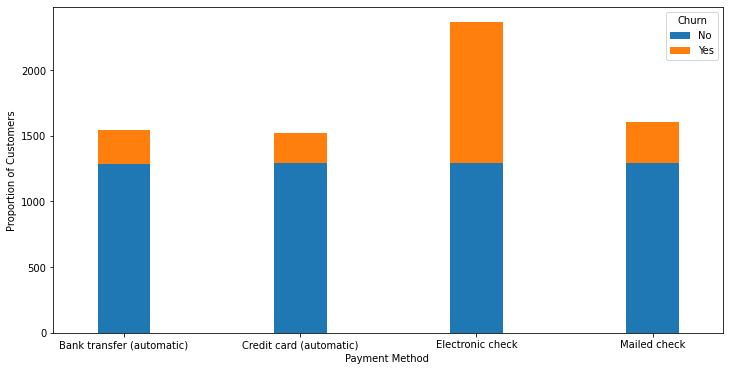

In [21]:
import matplotlib.ticker as mtick
contract_churn = data.groupby(['PaymentMethod','Churn']).size().unstack()
contract_churn.rename(columns={0:'No', 1:'Yes'}, inplace=True)
ax = contract_churn.plot(kind='bar',width = 0.3,stacked = True,rot = 0,figsize = (12,6))
plt.ylabel('Proportion of Customers')
plt.xlabel('Payment Method ')

Text(0.5, 0, 'Internet Service  ')

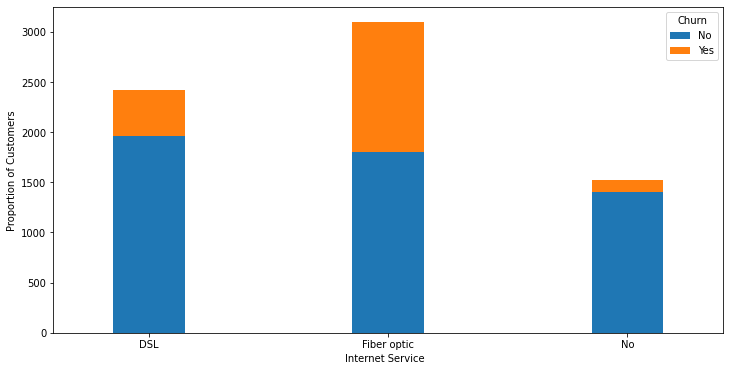

In [22]:
import matplotlib.ticker as mtick
contract_churn = data.groupby(['InternetService','Churn']).size().unstack()
contract_churn.rename(columns={0:'No', 1:'Yes'}, inplace=True)
ax = contract_churn.plot(kind='bar',width = 0.3,stacked = True,rot = 0,figsize = (12,6))
plt.ylabel('Proportion of Customers')
plt.xlabel('Internet Service  ')

Text(0.5, 0, 'Phone Service  ')

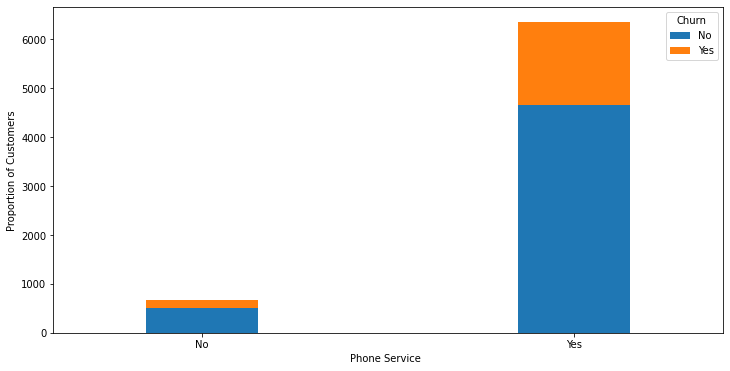

In [23]:
import matplotlib.ticker as mtick
contract_churn = data.groupby(['PhoneService','Churn']).size().unstack()
contract_churn.rename(columns={0:'No', 1:'Yes'}, inplace=True)
ax = contract_churn.plot(kind='bar',width = 0.3,stacked = True,rot = 0,figsize = (12,6))
plt.ylabel('Proportion of Customers')
plt.xlabel('Phone Service  ')

Text(0.5, 0, 'Senior Citizen   ')

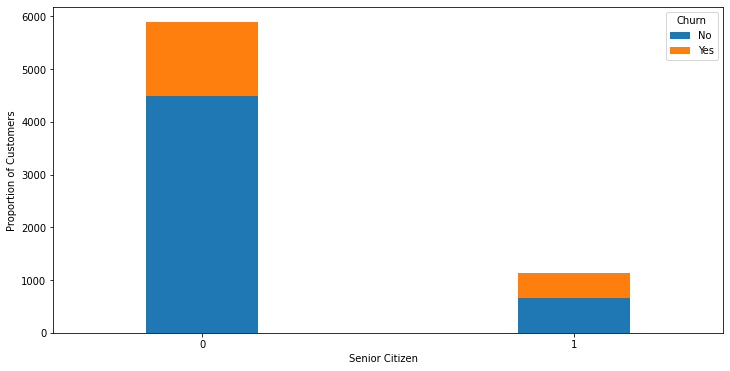

In [24]:
import matplotlib.ticker as mtick
contract_churn = data.groupby(['SeniorCitizen','Churn']).size().unstack()
contract_churn.rename(columns={0:'No', 1:'Yes'}, inplace=True)
ax = contract_churn.plot(kind='bar',width = 0.3,stacked = True,rot = 0,figsize = (12,6))
plt.ylabel('Proportion of Customers')
plt.xlabel('Senior Citizen   ')

Text(0.5, 0, 'Online Security  ')

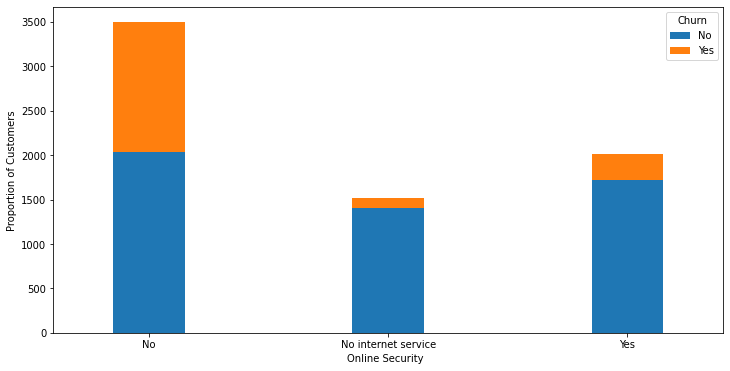

In [25]:
import matplotlib.ticker as mtick
contract_churn = data.groupby(['OnlineSecurity','Churn']).size().unstack()
contract_churn.rename(columns={0:'No', 1:'Yes'}, inplace=True)
ax = contract_churn.plot(kind='bar',width = 0.3,stacked = True,rot = 0,figsize = (12,6))
plt.ylabel('Proportion of Customers')
plt.xlabel('Online Security  ')

Text(0.5, 0, 'Device Protection  ')

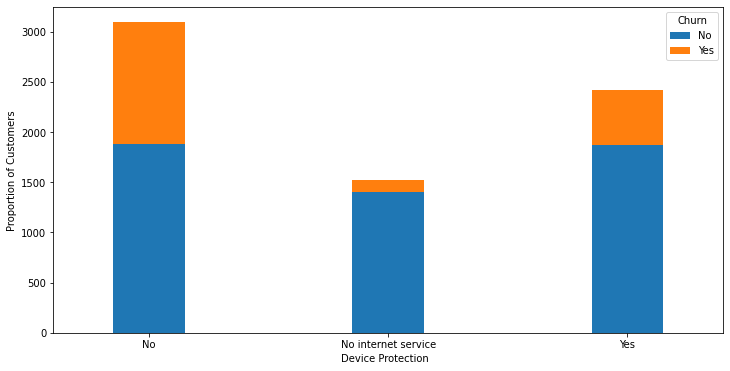

In [26]:
import matplotlib.ticker as mtick
contract_churn = data.groupby(['DeviceProtection','Churn']).size().unstack()
contract_churn.rename(columns={0:'No', 1:'Yes'}, inplace=True)
ax = contract_churn.plot(kind='bar',width = 0.3,stacked = True,rot = 0,figsize = (12,6))
plt.ylabel('Proportion of Customers')
plt.xlabel('Device Protection  ')

## Insights gained from above plots
- Customers with a month-to-month connection have a very high chance to churn if they have subscribed to pay via electronic checks and having Fiber Optical
- People with no online security and no device protection are prone to churn.

In [27]:
for attribute in categorical_cols:
    print(attribute,':')
    print(data[attribute].value_counts())
    print()

gender :
Male      3549
Female    3483
Name: gender, dtype: int64

SeniorCitizen :
0    5890
1    1142
Name: SeniorCitizen, dtype: int64

Partner :
No     3639
Yes    3393
Name: Partner, dtype: int64

Dependents :
No     4933
Yes    2099
Name: Dependents, dtype: int64

PhoneService :
Yes    6352
No      680
Name: PhoneService, dtype: int64

MultipleLines :
No                  3385
Yes                 2967
No phone service     680
Name: MultipleLines, dtype: int64

InternetService :
Fiber optic    3096
DSL            2416
No             1520
Name: InternetService, dtype: int64

OnlineSecurity :
No                     3497
Yes                    2015
No internet service    1520
Name: OnlineSecurity, dtype: int64

OnlineBackup :
No                     3087
Yes                    2425
No internet service    1520
Name: OnlineBackup, dtype: int64

DeviceProtection :
No                     3094
Yes                    2418
No internet service    1520
Name: DeviceProtection, dtype: int64

TechS

**Encoding Values Manually**

In [28]:
data.Churn.replace(to_replace=['No','Yes'] ,value=[0,1],inplace=True)
data.PaymentMethod.replace(to_replace=['Bank transfer (automatic)','Credit card (automatic)','Electronic check','Mailed check'] ,value=[0,1,2,3],inplace=True)
data.PaperlessBilling.replace(to_replace=['No','Yes'] ,value=[0,1],inplace=True)
data.Contract.replace(to_replace=['Month-to-month','One year','Two year'] ,value=[0,1,2],inplace=True)
data.StreamingMovies.replace(to_replace=['No','Yes','No internet service'] ,value=[0,1,2],inplace=True)
data.StreamingTV.replace(to_replace=['No','Yes','No internet service'] ,value=[0,1,2],inplace=True)
data.TechSupport.replace(to_replace=['No','Yes','No internet service'] ,value=[0,1,2],inplace=True)
data.DeviceProtection.replace(to_replace=['No','Yes','No internet service'] ,value=[0,1,2],inplace=True)
data.OnlineBackup.replace(to_replace=['No','Yes','No internet service'] ,value=[0,1,2],inplace=True)
data.OnlineSecurity.replace(to_replace=['No','Yes','No internet service'] ,value=[0,1,2],inplace=True)
data.InternetService.replace(to_replace=['DSL','Fiber optic','No'] ,value=[0,1,2],inplace=True)
data.MultipleLines.replace(to_replace=['No','Yes','No phone service'] ,value=[0,1,2],inplace=True)
data.PhoneService.replace(to_replace=['No','Yes'] ,value=[0,1],inplace=True)
data.Dependents.replace(to_replace=['No','Yes'] ,value=[0,1],inplace=True)
data.Partner.replace(to_replace=['No','Yes'] ,value=[0,1],inplace=True)
data.gender.replace(to_replace=['Male','Female'] ,value=[1,0],inplace=True)


## Lets Check for Multi-Collinearity among the attributes
- We can detect Multi-Collinearity using  VIF (Variable Inflation Factors) 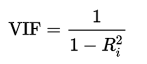
    - 1 = not correlated.
    - Between 1 and 5 = moderately correlated.
    - Greater than 5 = highly correlated.
- We can also detect Multi-Collinearity using correlation matrix and scatter plots
            

In [29]:
def vif(data):
    vif = pd.DataFrame()
    vif["variables"] = data.columns
    vif["VIF"] = [variance_inflation_factor(data.values, i) for i in range(data.shape[1])]
    return(vif)

In [30]:
vif( data[['gender','SeniorCitizen', 'Partner', 'Dependents',
'tenure', 'PhoneService','InternetService','OnlineSecurity','DeviceProtection','StreamingTV','TechSupport','StreamingMovies',
'PaperlessBilling','MonthlyCharges','Contract','PaymentMethod','TotalCharges']]).sort_values(by=['VIF'])

,variables,VIF
1,SeniorCitizen,1.364871
3,Dependents,1.958501
0,gender,1.961268
2,Partner,2.818616
12,PaperlessBilling,2.869946
15,PaymentMethod,3.182203
14,Contract,4.161143
7,OnlineSecurity,6.741724
10,TechSupport,7.342122
6,InternetService,7.408748


## We can see the above results 
- **TotalCharges**, **tenure**, **PhoneService**, **MonthlyCharges** are highly correlated

## Lets drop any one of the column which has high VIF value

In [31]:
vif( data[['gender','SeniorCitizen', 'Partner', 'Dependents',
'tenure', 'PhoneService','InternetService','OnlineSecurity','DeviceProtection','StreamingTV','TechSupport','StreamingMovies',
'PaperlessBilling','Contract','PaymentMethod']]).sort_values(by=['VIF'])

,variables,VIF
1,SeniorCitizen,1.349658
0,gender,1.922677
3,Dependents,1.950252
12,PaperlessBilling,2.603178
2,Partner,2.806198
14,PaymentMethod,2.920463
13,Contract,4.157277
4,tenure,5.816962
7,OnlineSecurity,6.036744
10,TechSupport,6.932996


## After dropping 'MonthlyCharges and TotalCharges we see VIF values for all the independent variables have decreased to some extent.

## Lets check Correlation Matrix

<AxesSubplot:>

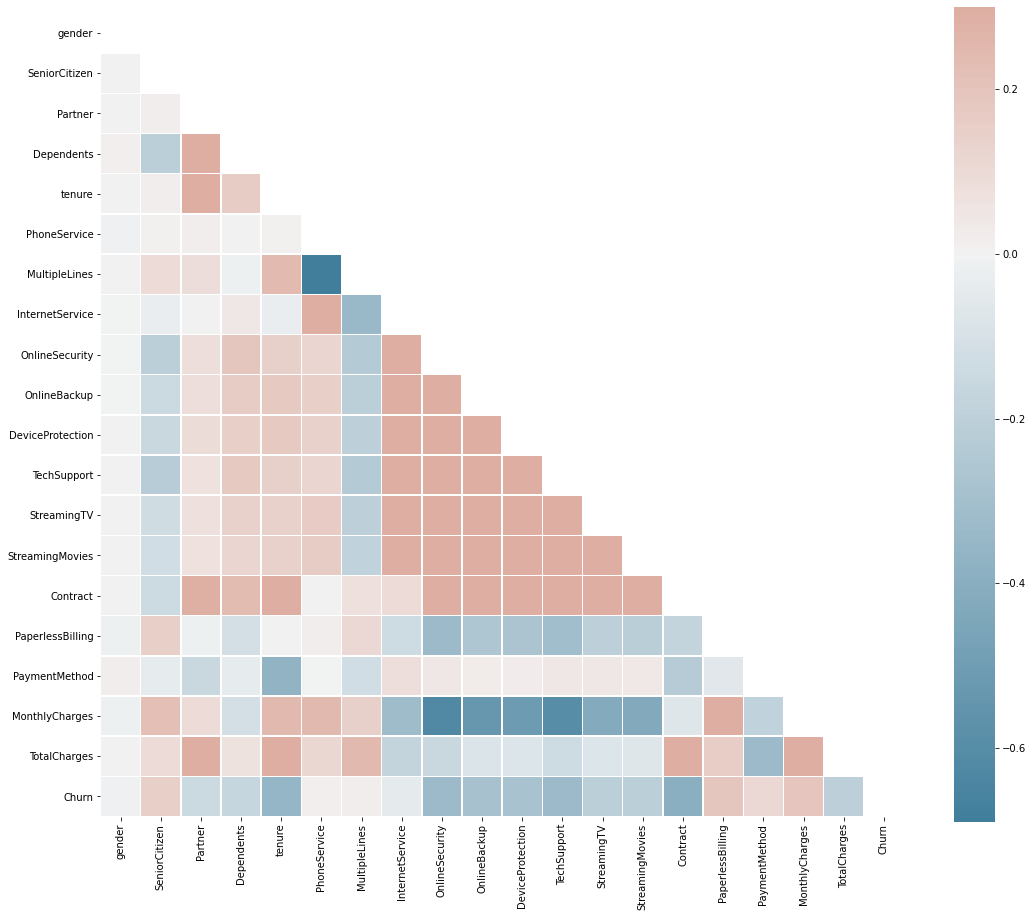

In [32]:
corr = data.corr()
f, ax = plt.subplots(figsize=(18, 15))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr,vmax=.3,cmap=cmap,mask=mask ,center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": 1})

## Preprocessing and Splitting Data Set

In [33]:
X = data.drop(columns=['customerID','Churn','TotalCharges'])
Y = data['Churn']

In [34]:
X= preprocessing.StandardScaler().fit(X).transform(X)
X[0]

array([-1.00943013, -0.44032709,  1.03561683, -0.65230493, -1.28024804,
       -3.05633383,  2.1113551 , -1.18361379, -0.90252008,  0.2863758 ,
       -0.99701893, -0.90810707, -1.07051651, -1.0780889 , -0.82673477,
        0.82893915,  0.39980518, -1.16169394])

In [35]:
Y[0]

0

In [36]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, Y, stratify=Y,test_size=0.2, random_state=44)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (5625, 18) (5625,)
Test set: (1407, 18) (1407,)


# Model Selection

# Logistic Regression

In [37]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression(solver='liblinear').fit(X_train,y_train)
LR

LogisticRegression(solver='liblinear')

In [38]:
y_predict_LR = LR.predict(X_test)
y_predict_LR[0:5]

array([0, 1, 1, 0, 0], dtype=int64)

In [39]:
LR_F1_Score = f1_score(y_test,y_predict_LR,average='weighted')
LR_accuracy = metrics.accuracy_score(y_test,y_predict_LR)
print('F1 Score :',LR_F1_Score)
print('Accuracy :',LR_accuracy)

F1 Score : 0.8011965469852834
Accuracy : 0.8095238095238095


# KNN

In [40]:
from sklearn.neighbors import KNeighborsClassifier

Minimum error:- 0.19971570717839374 at K = 14


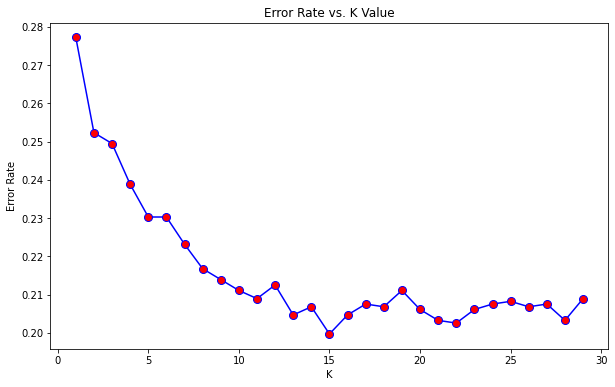

In [41]:
error_rate = []
for i in range(1,30):
 knn = KNeighborsClassifier(n_neighbors=i)
 knn.fit(X_train,y_train)
 pred_i = knn.predict(X_test)
 error_rate.append(np.mean(pred_i != y_test))

plt.figure(figsize=(10,6))
plt.plot(range(1,30),error_rate,color='blue', 
         marker='o',markerfacecolor='red', markersize=8)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
print("Minimum error:-",min(error_rate),"at K =",error_rate.index(min(error_rate)))

Maximum accuracy:- 0.8002842928216063 at K = 14


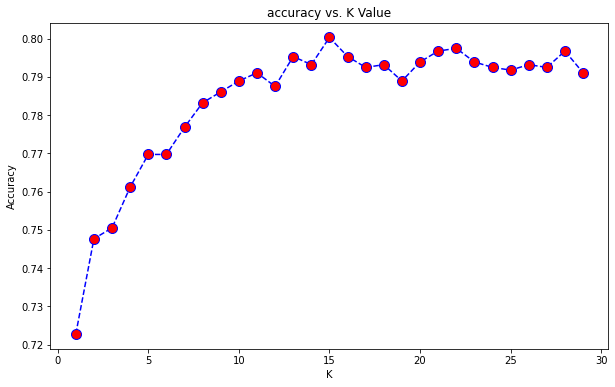

In [42]:
acc = []
from sklearn import metrics
for i in range(1,30):
    neigh = KNeighborsClassifier(n_neighbors = i).fit(X_train,y_train)
    yhat = neigh.predict(X_test)
    acc.append(metrics.accuracy_score(y_test, yhat))
    
plt.figure(figsize=(10,6))
plt.plot(range(1,30),acc,color = 'blue',linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('accuracy vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy')
print("Maximum accuracy:-",max(acc),"at K =",acc.index(max(acc)))

In [43]:
KNN = KNeighborsClassifier(n_neighbors = acc.index(max(acc))).fit(X_train,y_train)
KNN

KNeighborsClassifier(n_neighbors=14)

In [44]:
y_predict_KNN = KNN.predict(X_test)
y_predict_KNN[0:5]

array([0, 1, 1, 0, 0], dtype=int64)

In [45]:
KNN_F1_Score = f1_score(y_test,y_predict_KNN,average='weighted')
KNN_accuracy = metrics.accuracy_score(y_test,y_predict_KNN)
print('F1 Score :',KNN_F1_Score)
print('Accuracy :',KNN_accuracy)

F1 Score : 0.7807195986578819
Accuracy : 0.7931769722814499


# Decision Tree

In [46]:
from sklearn.tree import DecisionTreeClassifier

In [47]:
DTree = DecisionTreeClassifier(criterion = 'entropy').fit(X_train,y_train)
DTree 

DecisionTreeClassifier(criterion='entropy')

In [48]:
y_predict_DTree = DTree.predict(X_test)
y_predict_DTree[0:5]

array([0, 0, 1, 0, 1], dtype=int64)

In [49]:
DTree_F1_Score = f1_score(y_test,y_predict_DTree,average='weighted')
DTree_accuracy = metrics.accuracy_score(y_test,y_predict_DTree)
print('F1 Score :',DTree_F1_Score)
print('Accuracy :',DTree_accuracy)

F1 Score : 0.7338776220288803
Accuracy : 0.7327647476901208


# SVM

In [50]:
from sklearn import svm
SVM = svm.SVC().fit(X_train, y_train)
SVM

SVC()

In [51]:
y_predict_SVM = SVM.predict(X_test)
y_predict_SVM[0:5]

array([0, 1, 1, 0, 0], dtype=int64)

In [52]:
SVM_F1_Score = f1_score(y_test,y_predict_SVM,average='weighted')
SVM_accuracy = metrics.accuracy_score(y_test,y_predict_SVM)
print('F1 Score :',SVM_F1_Score)
print('Accuracy :',SVM_accuracy)

F1 Score : 0.8002120103471694
Accuracy : 0.8130774697938877


# Random Forest

In [53]:
from sklearn.ensemble import RandomForestClassifier

Maximum accuracy:- 0.8038379530916845 at n_estimators = 83


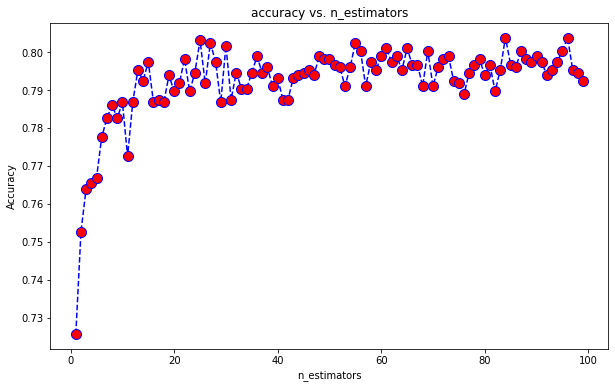

In [54]:
acc = []
from sklearn import metrics
for i in range(1,100):
    rfc = RandomForestClassifier(n_estimators = i).fit(X_train, y_train)
    yhat = rfc.predict(X_test)
    acc.append(metrics.accuracy_score(y_test, yhat))
    
plt.figure(figsize=(10,6))
plt.plot(range(1,100),acc,color = 'blue',linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('accuracy vs. n_estimators')
plt.xlabel('n_estimators')
plt.ylabel('Accuracy')
print("Maximum accuracy:-",max(acc),"at n_estimators =",acc.index(max(acc)))

In [55]:
RFC = RandomForestClassifier(n_estimators=acc.index(max(acc)), criterion = 'entropy').fit(X_train, y_train)
RFC

RandomForestClassifier(criterion='entropy', n_estimators=83)

In [56]:
y_predict_RFC = RFC.predict(X_test)
y_predict_RFC[0:5]

array([0, 1, 0, 0, 0], dtype=int64)

In [57]:
RFC_F1_Score = f1_score(y_test,y_predict_RFC,average='weighted')
RFC_accuracy = metrics.accuracy_score(y_test,y_predict_RFC)
print('F1 Score :',RFC_F1_Score)
print('Accuracy :',RFC_accuracy)

F1 Score : 0.7789418061255754
Accuracy : 0.7931769722814499


# XGBoost

In [58]:
import xgboost as xg
from xgboost import XGBClassifier

In [59]:
XGB = xg.XGBClassifier(max_depth=10,learning_rate=0.29,n_estimators=110).fit(X_train, y_train)
XGB

c:\users\pramo\anaconda3\envs\tensorflow\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:44:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.29, max_delta_step=0, max_depth=10,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=110, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [60]:
y_predict_XGB = XGB.predict(X_test)
y_predict_XGB[0:5]

array([0, 1, 0, 0, 0], dtype=int64)

In [61]:
XGB_F1_Score = f1_score(y_test,y_predict_XGB,average='weighted')
XGB_accuracy = metrics.accuracy_score(y_test,y_predict_XGB)
print('F1 Score :',XGB_F1_Score)
print('Accuracy :',XGB_accuracy)

F1 Score : 0.7727869065974393
Accuracy : 0.783226723525231


# Report

In [62]:
data = {'Algorithm':['LogisticRegression','KNN','Decision Tree','SVM','Random Forest','XGBoost'],
        'Accuracy':[LR_accuracy,KNN_accuracy,DTree_accuracy,SVM_accuracy,RFC_accuracy,XGB_accuracy],
        'F1-score':[LR_F1_Score,KNN_F1_Score,DTree_F1_Score,SVM_F1_Score,RFC_F1_Score,XGB_F1_Score]
        
       }
Report = pd.DataFrame(data,columns=['Algorithm','Accuracy','F1-score'])

In [63]:
Report

,Algorithm,Accuracy,F1-score
0,LogisticRegression,0.809524,0.801197
1,KNN,0.793177,0.780720
2,Decision Tree,0.732765,0.733878
3,SVM,0.813077,0.800212
4,Random Forest,0.793177,0.778942
5,XGBoost,0.783227,0.772787
